In [35]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [36]:
# portfolio of crypto
crypto = ['BTC-USD', 'ETH-USD', 'BNB-USD']

In [37]:
# import yfinance as yf

# # Download historical data from yf API
# data = yf.download(crypto, group_by='ticker', period="max")

# # download data to csv
# data.to_csv("crypto.csv")

In [38]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("crypto.csv", header=[0,1], index_col=0)

# df.head()

In [39]:
# # Drop any rows that are completely NaN (e.g. 'Date' row)
# df = df.dropna(how='all')

# Forward fill missing values for each column
df = df.fillna(method='ffill')

# Backfill any remaining NaN values with 0
df = df.fillna(0)

# Convert all values to float
df = df.astype(float)

# From level 0 columns, replace '-USD' with empty string to keep only ticker symbols
df.columns = df.columns.set_levels(df.columns.levels[0].str.replace('-USD', ''), level=0)

# Show the result
df.head()

Ticker      ETH                                BTC                          \
Price      Open High  Low Close Volume        Open        High         Low   
Date                                                                         
2014-09-17  0.0  0.0  0.0   0.0    0.0  465.864014  468.174011  452.421997   
2014-09-18  0.0  0.0  0.0   0.0    0.0  456.859985  456.859985  413.104004   
2014-09-19  0.0  0.0  0.0   0.0    0.0  424.102997  427.834991  384.532013   
2014-09-20  0.0  0.0  0.0   0.0    0.0  394.673004  423.295990  389.882996   
2014-09-21  0.0  0.0  0.0   0.0    0.0  408.084991  412.425995  393.181000   

Ticker                              BNB                         
Price            Close      Volume Open High  Low Close Volume  
Date                                                            
2014-09-17  457.334015  21056800.0  0.0  0.0  0.0   0.0    0.0  
2014-09-18  424.440002  34483200.0  0.0  0.0  0.0   0.0    0.0  
2014-09-19  394.795990  37919700.0  0.0  0.0  0.0   0.0    0.0  
2014-09-20  408.903992  36863600.0  0.0  0.0  0.0   0.0    0.0  
2014-09-21  398.821014  26580100.0  0.0  0.0  0.0   0.0    0.0

In [40]:
# for ticker in df.columns.levels[0], create a df named {ticker} (lowercase) containing only the data for that ticker
for ticker in df.columns.levels[0]:
    globals()[ticker.lower()] = df[ticker]

btc.head()
# eth.head()
# bnb.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [41]:
# create a list with the dataframes
crypto_dfs = [btc, eth, bnb]

In [42]:
# iterate over the list and calculate returns and drawdowns for each dataframe
crypto_names = ['BTC', 'ETH', 'BNB']
crypto_dfs = [btc, eth, bnb]

for name, crypto_df in zip(crypto_names, crypto_dfs):
    # Calculate simple returns with pct_change()
    crypto_df['simple_returns'] = crypto_df['Close'].pct_change().fillna(0)

    # Cumulative product of simple returns (correct for compounding)
    crypto_df['cumprod_simple'] = (1 + crypto_df['simple_returns']).cumprod() - 1

    crypto_df['cumumax'] = crypto_df['cumprod_simple'].cummax()

    crypto_df['drawdown'] = (crypto_df['cumprod_simple'] - crypto_df['cumumax'])/(crypto_df['cumumax'] + 1)
    max_drawdown = crypto_df['drawdown'].min()
    print(f"Max Drawdown for {name}: {max_drawdown:.2%}")

Max Drawdown for BTC: -83.40%
Max Drawdown for ETH: 0.00%
Max Drawdown for BNB: 0.00%


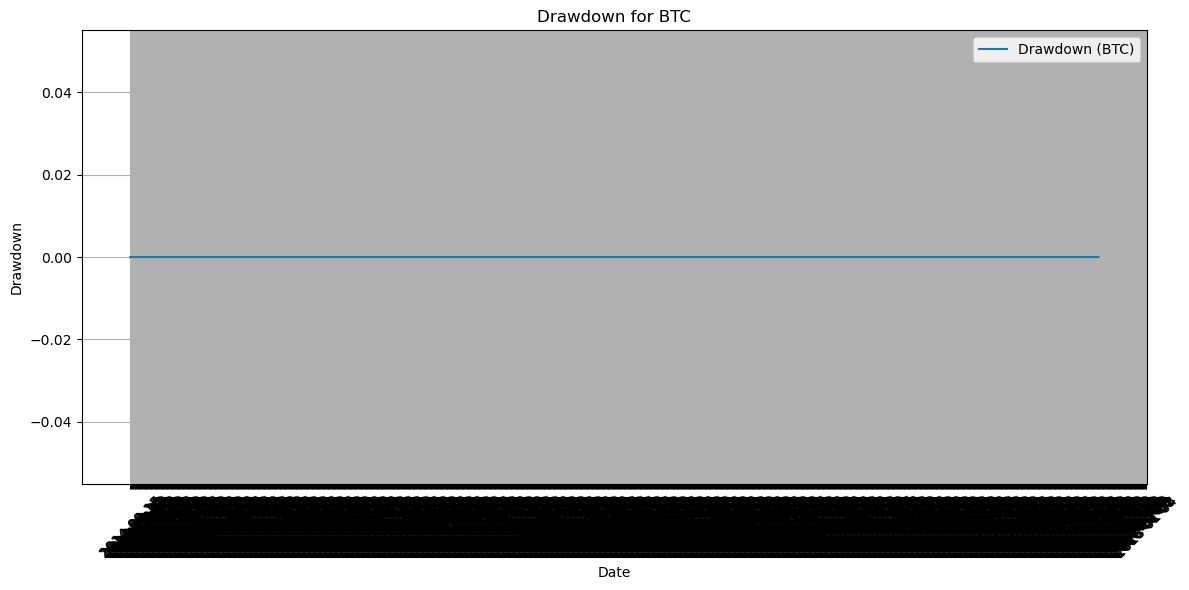

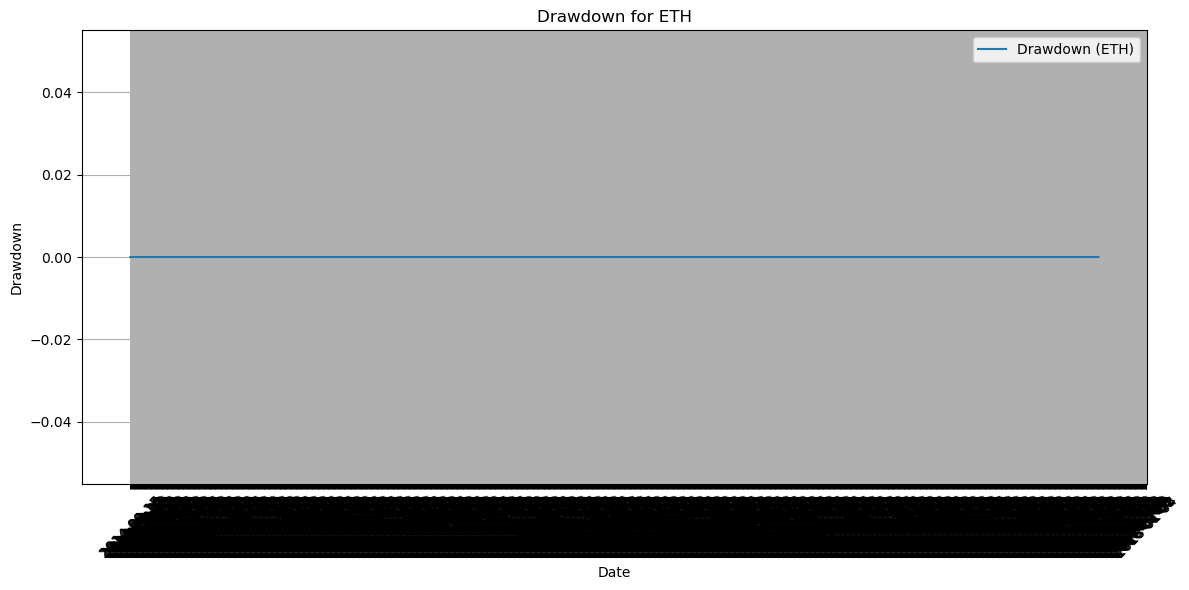

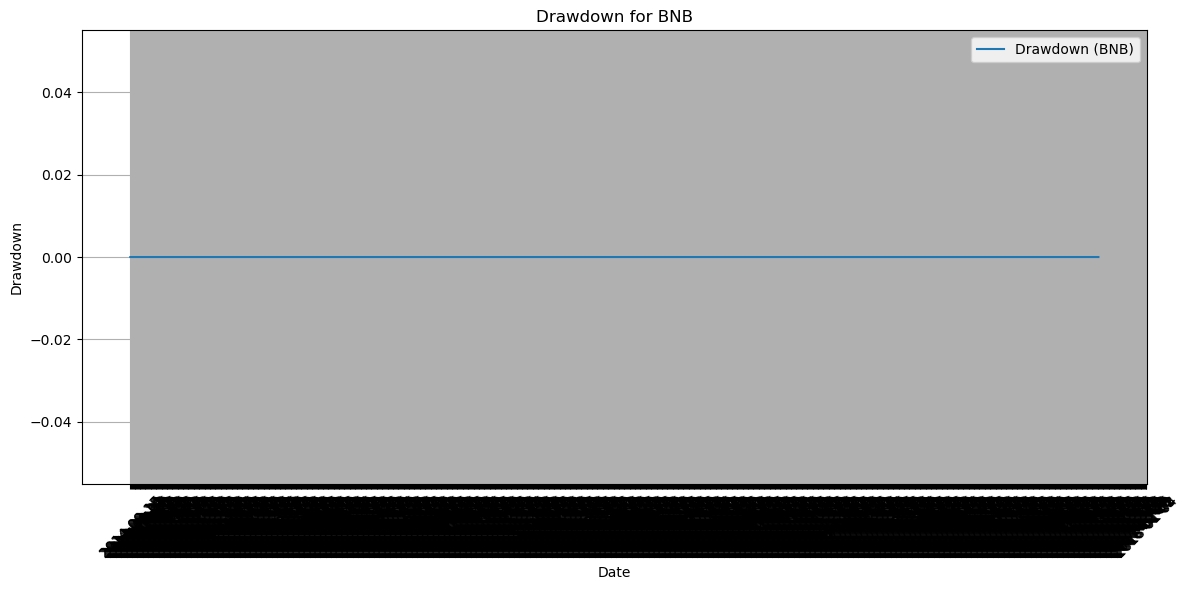

In [43]:
for name, crypto_df in zip(crypto_names, crypto_dfs):
    # plot drawdown and datetime
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_df.index, drawdown, label=f'Drawdown ({name})')
    plt.title(f'Drawdown for {name}')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()